#Setting up Data

In [ ]:
X = [4, 5, 9, 6, 1, 3, 2, 8, 0, 7]
Y = [7, 3, 8, 1, 4, 2, 0, 9, 5, 6]
Z = [1, 4, 3, 5, 2, 8, 6, 0, 7, 9]
data = list(zip(X, Y, Z))
print(data)

[(4, 7, 1), (5, 3, 4), (9, 8, 3), (6, 1, 5), (1, 4, 2), (3, 2, 8), (2, 0, 6), (8, 9, 0), (0, 5, 7), (7, 6, 9)]


#Plotting my data

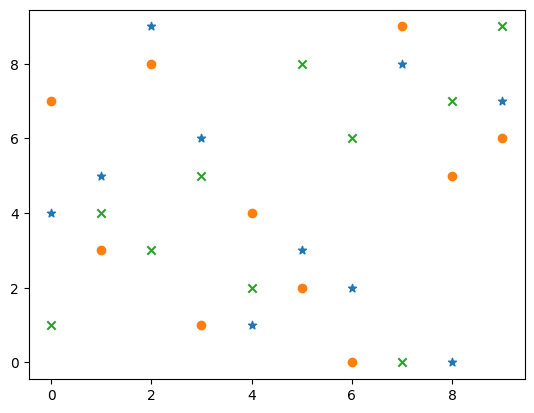

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(0, 10), X, marker='*')
plt.scatter(range(0, 10), Y, marker='o')
plt.scatter(range(0, 10), Z, marker='x')
plt.show()

#K-Means Definition

In [ ]:
from copy import copy, deepcopy

class KMeans:
  def __init__(self, K) -> None:
    self.n_clusters = K
    self.alreadyCentroids = set()
    self.centroids = []
    self.labels = []

  def findInitialCentroids(self, dataset):
    centroids = []
    for i in range(self.n_clusters):
      centroids.append(dataset[i])

    self.centroids = centroids

  def findCentroids(self, group):
    newCentroids = [] * self.n_clusters
    for key, val in group.items():
      res = []
      for j in range(len(val[0])):
        sumEle = 0
        for i in range(len(val)):
          sumEle += val[i][j]
        res.append(sumEle / len(val))
      newCentroids.append(res)
    self.centroids = newCentroids

  def findDistance(self, arr1, arr2):
    # Euclidean Distance Calculation
    res = 0
    for i in range(len(arr1)):
      res += (arr1[i] - arr2[i]) ** 2
    return (res ** 0.5)

  def findMinIndex(self, arr):
    mnIdx = 0
    mnval = float('inf')

    for i in range(len(arr)):
      if arr[i] < mnval:
        mnval = arr[i]
        mnIdx = i
    return mnIdx

  def label(self, dataset):
    centroidsArr = self.centroids
    res = [0] * len(dataset)

    for i in range(len(dataset)):
      dis = [0] * len(centroidsArr)
      for j in range(len(centroidsArr)):
        dis[j] = self.findDistance(dataset[i], centroidsArr[j])
      res[i] = self.findMinIndex(dis)

    self.labels = res

  def centroidsAreNotEqual(self, arr1, arr2):
    if len(arr1) != len(arr2):
      return True
    for i in range(len(arr1)):
      for j in range(len(arr1[0])):
        if arr1[i][j] != arr2[i][j]:
          return True
    return False

  def fit(self, data):
    self.findInitialCentroids(data)
    self.label(data)

    # Initial grouping
    group = {k:[] for k in range(self.n_clusters)}
    for i, val in enumerate(data):
      group[self.labels[i]].append(val)

    newCentroids = []
    # K-Means Clustering until centroids stop moving
    while self.centroidsAreNotEqual(self.centroids, newCentroids):
      #print(self.labels, self.centroids, group, sep='\n')
      newCentroids = deepcopy(self.centroids)
      self.findCentroids(group)
      self.label(data)
      group = {k:[] for k in range(self.n_clusters)}
      for i, val in enumerate(data):
        group[self.labels[i]].append(val)
      #print()

#Testing my code

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)
print(kmeans.labels, kmeans.centroids, sep='\n')

[0, 1, 2, 1, 0, 1, 1, 2, 1, 1]
[[2.5, 5.5, 1.5], [3.8333333333333335, 2.8333333333333335, 6.5], [8.5, 8.5, 1.5]]


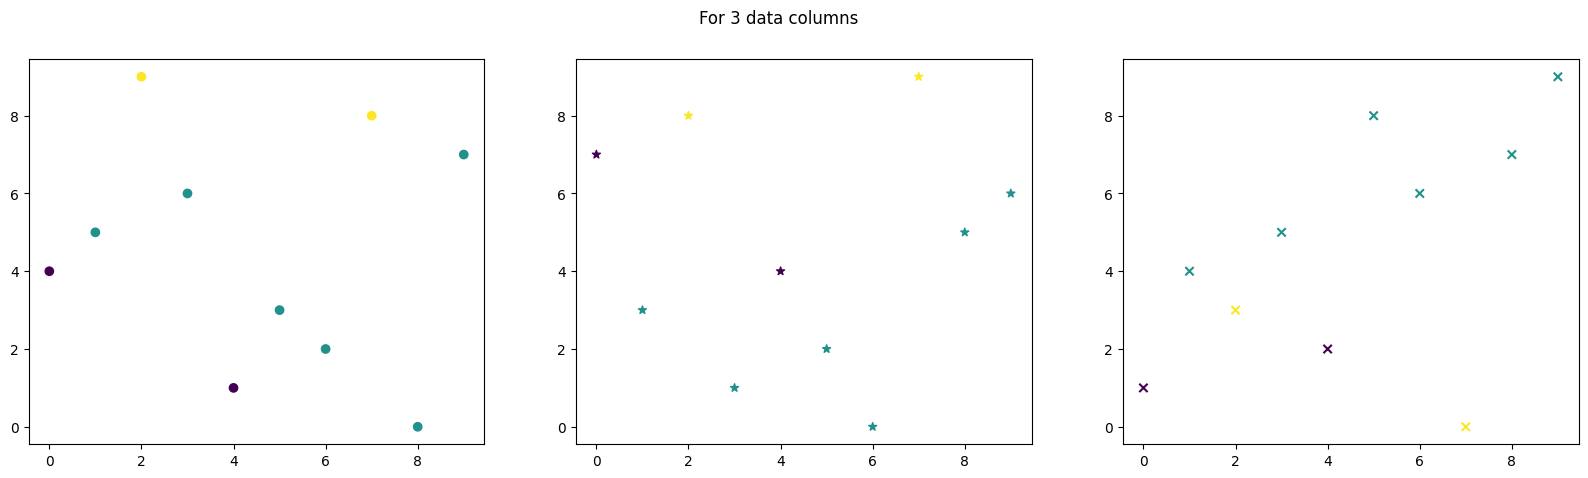

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('For 3 data columns')
ax1.scatter(range(10), X, c = kmeans.labels, marker='o')
ax2.scatter(range(10), Y, c = kmeans.labels, marker='*')
ax3.scatter(range(10), Z, c = kmeans.labels, marker='x')
plt.show()

In [ ]:
from sklearn.datasets import load_iris
x, y = load_iris(return_X_y=True)
kmeans = KMeans(3)
kmeans.fit(x)
print(kmeans.labels, kmeans.centroids, sep='\n')

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[[6.853846153846153, 3.0769230769230766, 5.715384615384615, 2.053846153846153], [5.88360655737705, 2.740983606557377, 4.388524590163935, 1.4344262295081966], [5.005999999999999, 3.428000000000001, 1.4620000000000002, 0.2459999999999999]]
